<a href="https://colab.research.google.com/github/AndrewLoweUoM/lake_district/blob/main/Crowden_Model_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Python code evaulates the accuarcy of the predicted flows against the observed flows using performance measures. The summary of the code is below:

1. **Imports Libraries**:
   - Imports necessary libraries for data manipulation (`pandas`), numerical operations (`numpy`), Google Drive access (`google.colab`), plotting (`matplotlib`), and machine learning (`sklearn`).

2. **Prints Name and Student ID**:
   - Displays the name and student ID of the user.

3. **Mounts Google Drive**:
   - Mounts Google Drive to access files stored there.

4. **Loads Data**:
   - Reads a CSV file containing observed and predicted flow data from Google Drive into a pandas DataFrame.

5. **Extracts Data**:
   - Extracts the observed and predicted flow data columns from the DataFrame.

6. **Evaluates Model Performance**:
   - **Calculates R-squared (R2) and Mean Squared Error (MSE)**:
     - Uses `sklearn.metrics` to calculate and print R2 and MSE to evaluate the overall performance of the predicted flow data against the observed flow data.
   - **Calculates Nash-Sutcliffe Efficiency (NSE) and Percent Bias (PBIAS)**:
     - Calculates NSE to measure how well the predicted values match the observed values.
     - Calculates PBIAS to quantify the average tendency of the predicted values to be larger or smaller than their observed counterparts.

7. **Fits a Linear Regression Model**:
   - Prepares the observed flow data as the predictor variable (`obs_flow_X`) and the predicted flow data as the target variable (`pred_flow_y`).
   - Fits a linear regression model using `sklearn.linear_model.LinearRegression`.
   - Prints the coefficients and intercept of the fitted model.
   - Predicts the flow data using the fitted linear regression model.
   - Calculates and prints the MSE and R2 for the predictions made by the linear regression model.

8. **Plots Data**:
   - Creates a scatter plot of the observed flow data against the predicted flow data.
   - Adds a line representing the linear regression model fit.
   - Labels the plot axes and adds a title, legend, and grid for better visualization.

### Summary of Key Outputs:
- **Performance Metrics**: R2, MSE, NSE, and PBIAS values for the model's predictions.
- **Model Coefficients**: Coefficients and intercept of the linear regression model.
- **Scatter Plot**: A visual representation comparing observed flow data to predicted flow data, including the fit line from the linear regression model.

**Model Performance Statistics to measure the accuracy of the model prediction Site 60**

Model Performance Statistics to measure the accuracy of the model prediction Site 50

Andrew Lowe
ID 1223456
Mounted at /content/drive/
Evaluation Metrics for Total Predicted Flow:
R2: 0.74
MSE: 11328.86
Nash-Sutcliffe Efficiency (NSE): 0.74
Percent Bias (PBIAS): -2.37
Coefficient (Scikit-learn): 0.69
Intercept (Scikit-learn): 65.06
Mean Squared Error (Scikit-learn): 7243.39
R-squared (Scikit-learn): 0.74


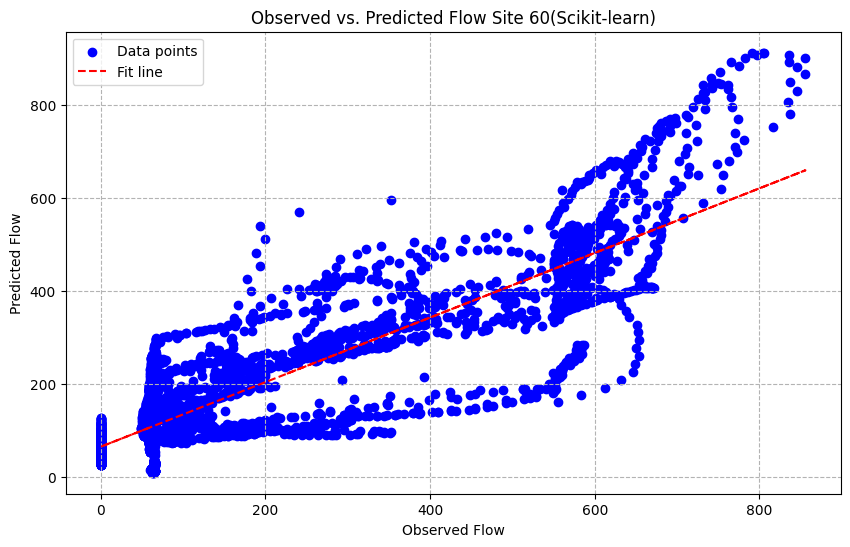

Summary results saved successfully to /content/drive/MyDrive/Crowden_pm/Site60/Output/S60_model_pm_summary_results.csv!


In [9]:
# Check model accuracy using performance measures.

# IMPORT LIBRARIES
import pandas as pd  # pandas for data manipulation
import numpy as np  # numpy for numerical operations
from google.colab import drive  # used in Google Colab notebooks to mount Google Drive
import matplotlib.pyplot as plt  # for plotting graphs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# NAME AND STUDENT ID
print('Andrew Lowe')
print('ID 1223456')

# LOAD DATA CSV FILES

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the flow data CSV file from Google Drive (files in folder 'Previous Input Files')
file_path = '/content/drive/MyDrive/Crowden_pm/Site60/Input/S50_TS_2018_ReFH.csv'

# Read flow data from CSV file
flow_data = pd.read_csv(file_path)

# Extract the first and second columns of data
obs_data = flow_data['Observed Flow S50']
pred_data = flow_data['Predicted Flow S50']

# EVALUATE THE PERFORMANCE OF THE RUNOFF MODEL

# Evaluate runoff model results (1) with simple R2 and mean squared error (MSE)

# Calculate evaluation metrics for total predicted flow
r2_total = r2_score(obs_data, pred_data)
mse_total = mean_squared_error(obs_data, pred_data)

# Print evaluation metrics for total predicted flow
print("Evaluation Metrics for Total Predicted Flow:")
print(f"R2: {r2_total:.2f}")
print(f"MSE: {mse_total:.2f}")

# Evaluate model results using Nash-Sutcliffe Efficiency (NSE) and PBIAS

# Calculate mean of observed values
observed_mean = np.mean(obs_data)

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum((obs_data - pred_data) ** 2) / np.sum((obs_data - observed_mean) ** 2))

# Calculate Percent Bias (PBIAS)
pbias = (np.sum(obs_data - pred_data) / np.sum(obs_data)) * 100

print(f"Nash-Sutcliffe Efficiency (NSE): {nse:.2f}")
print(f"Percent Bias (PBIAS): {pbias:.2f}")

# Evaluate runoff model results (3) by fitting a linear regression model using Scikit-learn

# Prepare the data
obs_flow_X = obs_data.values.reshape(-1, 1)  # Predictor variable
pred_flow_y = pred_data  # Target variable

# Create and fit a linear regression model using Scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(obs_flow_X, pred_flow_y)

# Print coefficients and intercept from Scikit-learn model
coef_sklearn = model_sklearn.coef_[0]
intercept_sklearn = model_sklearn.intercept_
print(f"Coefficient (Scikit-learn): {coef_sklearn:.2f}")
print(f"Intercept (Scikit-learn): {intercept_sklearn:.2f}")

# Predict using the Scikit-learn model
pred_flow_y_pred_sklearn = model_sklearn.predict(obs_flow_X)

# Calculate mean squared error and R-squared for Scikit-learn model
mse_sklearn = mean_squared_error(pred_flow_y, pred_flow_y_pred_sklearn)
r2_sklearn = r2_score(pred_flow_y, pred_flow_y_pred_sklearn)
print(f"Mean Squared Error (Scikit-learn): {mse_sklearn:.2f}")
print(f"R-squared (Scikit-learn): {r2_sklearn:.2f}")

# CREATE SCATTER PLOT OF OBSERVED FLOW AND PREDICTED FLOW

# Scatter plot of actual vs. predicted values and fitting a linear regression model using Scikit-learn
plt.figure(figsize=(10, 6))
plt.scatter(obs_data, pred_data, color='blue', label='Data points')
plt.plot(obs_data, pred_flow_y_pred_sklearn, color='red', linestyle='--', label='Fit line')
plt.xlabel('Observed Flow')
plt.ylabel('Predicted Flow')
plt.title('Observed vs. Predicted Flow Site 50(Scikit-learn)')
plt.legend()
plt.grid(True, which="both", ls="--", color='0.7')
plt.show()

# Write summary results to a CSV file
summary_results = {
    'Metric': ['R2 (Total)', 'MSE (Total)', 'NSE', 'PBIAS', 'Coefficient (Sklearn)', 'Intercept (Sklearn)', 'MSE (Sklearn)', 'R2 (Sklearn)'],
    'Value': [f"{r2_total:.2f}", f"{mse_total:.2f}", f"{nse:.2f}", f"{pbias:.2f}", f"{coef_sklearn:.2f}", f"{intercept_sklearn:.2f}", f"{mse_sklearn:.2f}", f"{r2_sklearn:.2f}"]
}

summary_df = pd.DataFrame(summary_results)
summary_file_path = '/content/drive/MyDrive/Crowden_pm/Site60/Output/S50_model_pm_summary_results.csv'
summary_df.to_csv(summary_file_path, index=False)
print(f"Summary results saved successfully to {summary_file_path}!")


In [ ]:
# Check model accuracy using performance measures.

# IMPORT LIBRARIES
import pandas as pd  # pandas for data manipulation
import numpy as np  # numpy for numerical operations
from google.colab import drive  # used in Google Colab notebooks to mount Google Drive
import matplotlib.pyplot as plt  # for plotting graphs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# NAME AND STUDENT ID
print('Andrew Lowe')
print('ID 1223456')

# LOAD DATA CSV FILES

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the flow data CSV file from Google Drive (files in folder 'Previous Input Files')
file_path = '/content/drive/MyDrive/Crowden_pm/Site60/Input/S60_TS_2018_ReFH.csv'

# Read flow data from CSV file
flow_data = pd.read_csv(file_path)

# Extract the first and second columns of data
obs_data = flow_data['Observed Flow S60']
pred_data = flow_data['Predicted Flow S60']

# EVALUATE THE PERFORMANCE OF THE RUNOFF MODEL

# Evaluate runoff model results (1) with simple R2 and mean squared error (MSE)

# Calculate evaluation metrics for total predicted flow
r2_total = r2_score(obs_data, pred_data)
mse_total = mean_squared_error(obs_data, pred_data)

# Print evaluation metrics for total predicted flow
print("Evaluation Metrics for Total Predicted Flow:")
print(f"R2: {r2_total:.2f}")
print(f"MSE: {mse_total:.2f}")

# Evaluate model results using Nash-Sutcliffe Efficiency (NSE) and PBIAS

# Calculate mean of observed values
observed_mean = np.mean(obs_data)

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum((obs_data - pred_data) ** 2) / np.sum((obs_data - observed_mean) ** 2))

# Calculate Percent Bias (PBIAS)
pbias = (np.sum(obs_data - pred_data) / np.sum(obs_data)) * 100

print(f"Nash-Sutcliffe Efficiency (NSE): {nse:.2f}")
print(f"Percent Bias (PBIAS): {pbias:.2f}")

# Evaluate runoff model results (3) by fitting a linear regression model using Scikit-learn

# Prepare the data
obs_flow_X = obs_data.values.reshape(-1, 1)  # Predictor variable
pred_flow_y = pred_data  # Target variable

# Create and fit a linear regression model using Scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(obs_flow_X, pred_flow_y)

# Print coefficients and intercept from Scikit-learn model
coef_sklearn = model_sklearn.coef_[0]
intercept_sklearn = model_sklearn.intercept_
print(f"Coefficient (Scikit-learn): {coef_sklearn:.2f}")
print(f"Intercept (Scikit-learn): {intercept_sklearn:.2f}")

# Predict using the Scikit-learn model
pred_flow_y_pred_sklearn = model_sklearn.predict(obs_flow_X)

# Calculate mean squared error and R-squared for Scikit-learn model
mse_sklearn = mean_squared_error(pred_flow_y, pred_flow_y_pred_sklearn)
r2_sklearn = r2_score(pred_flow_y, pred_flow_y_pred_sklearn)
print(f"Mean Squared Error (Scikit-learn): {mse_sklearn:.2f}")
print(f"R-squared (Scikit-learn): {r2_sklearn:.2f}")

# CREATE SCATTER PLOT OF OBSERVED FLOW AND PREDICTED FLOW

# Scatter plot of actual vs. predicted values and fitting a linear regression model using Scikit-learn
plt.figure(figsize=(10, 6))
plt.scatter(obs_data, pred_data, color='blue', label='Data points')
plt.plot(obs_data, pred_flow_y_pred_sklearn, color='red', linestyle='--', label='Fit line')
plt.xlabel('Observed Flow')
plt.ylabel('Predicted Flow')
plt.title('Observed vs. Predicted Flow Site 60(Scikit-learn)')
plt.legend()
plt.grid(True, which="both", ls="--", color='0.7')
plt.show()

# Write summary results to a CSV file
summary_results = {
    'Metric': ['R2 (Total)', 'MSE (Total)', 'NSE', 'PBIAS', 'Coefficient (Sklearn)', 'Intercept (Sklearn)', 'MSE (Sklearn)', 'R2 (Sklearn)'],
    'Value': [f"{r2_total:.2f}", f"{mse_total:.2f}", f"{nse:.2f}", f"{pbias:.2f}", f"{coef_sklearn:.2f}", f"{intercept_sklearn:.2f}", f"{mse_sklearn:.2f}", f"{r2_sklearn:.2f}"]
}

summary_df = pd.DataFrame(summary_results)
summary_file_path = '/content/drive/MyDrive/Crowden_pm/Site60/Output/S60_model_pm_summary_results.csv'
summary_df.to_csv(summary_file_path, index=False)
print(f"Summary results saved successfully to {summary_file_path}!")